# Analysing merge sort and modified merge sort - CZ2001 Lab4

### Aim:
1. Generate datasets of varying sizes (1,000 - 1 million)
2. Count key comparisons and CPU times on the data generated, and compare the two variations of mergesort on these parameters
3. Study the performance of the algorithm as `S` varies
4. Determine the value of `S` by trial and error

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random, csv, copy

In [2]:
import mergeAndInsertion

## Getting comparison metrics for original mergesort

In [194]:
n=1000
data = [random.randint(1, 20000) for _ in range(n)] # below fine if you run it the second time?!

In [195]:
# testing mergesort
m=mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data))
# print('time taken:',m.timeTaken)
m.testMerge()
mergeTime = m.timeTaken
mergeComparisons = m.keyCmpCounter
print('Mergesort:')
print(f'\ttime taken : {mergeTime}ns \n\tkeyComparisons : {mergeComparisons}')

Mergesort:
	time taken : 34328500ns 
	keyComparisons : 13029


## Analyzing modified mergesort

In [196]:
# letting 'S' vary from 0 to n
tableList =[]
for S in range(0,n):
    m = mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data));
    m.testMergeModified(S)
    time = m.timeTaken
    comparisons = m.keyCmpCounter
    tableList.append([S, time, comparisons])    

In [199]:
tableDf = pd.DataFrame(tableList, columns = ['S', 'time', 'keyCmp'])
tableDf.head()

,S,time,keyCmp
0,0,44362300,13029
1,1,53219900,11909
2,2,50991400,11839
3,3,51592400,10644
4,4,58625000,10644


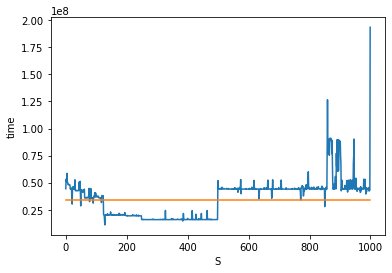

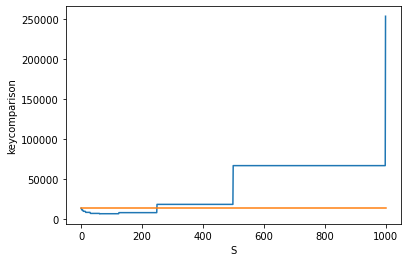

In [198]:
x = tableDf.iloc[:,0]
y = tableDf.iloc[:,1]
z = pd.Series([mergeTime]*n)
fig,ax = plt.subplots()
ax.plot(x,y,z)
ax.set(xlabel = 'S', ylabel = 'time')

x = tableDf.iloc[:,0]
y = tableDf.iloc[:,2]
z = pd.Series([mergeComparisons]*n) # y = mergeComparisons
fig2,ax2 = plt.subplots()
ax2.plot(x,y,z)
# ax.plot([0,n], [mergeComparisons,mergeComparisons])
ax2.set(xlabel = 'S', ylabel = 'keycomparison')

plt.show()

In [ ]:
x = tableDf.iloc[:,0]
y = tableDf.iloc[:,2]
z = pd.Series([mergeComparisons]*n) # y = mergeComparisons
fig,ax = plt.subplots()
ax.plot(x,y,z)
# ax.plot([0,n], [mergeComparisons,mergeComparisons])
ax.set(xlabel = 'S', ylabel = 'keycomparison')
plt.show()

# Function with which we vary 'n'

In [209]:
def compareOriginalAndModified(n, ascending = False, descending = False, step = 1):
    data = [random.randint(1, 20000) for _ in range(n)]
    if(ascending):
        data = sorted(data)
    if(descending):
        data = sorted(data, reverse = True)
    
    # Mergesort
    m=mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data))
    m.testMerge()
    mergeTime = m.timeTaken
    mergeComparisons = m.keyCmpCounter
    print('Mergesort:')
    print(f'\ttime taken : {mergeTime}ns \n\tkeyComparisons : {mergeComparisons}')
    
    # Mergesort modifed :
    # letting 'S' vary from 0 to n
    tableList =[]
    for S in range(0,n, step):
        m = mergeAndInsertion.mergeAndInsertion(copy.deepcopy(data));
        m.testMergeModified(S)
        time = m.timeTaken
        comparisons = m.keyCmpCounter
        tableList.append([S, time, comparisons])    
    tableDf = pd.DataFrame(tableList, columns = ['S', 'time', 'keyCmp'])
    x = tableDf.iloc[:,0]
    y = tableDf.iloc[:,1]
    z = pd.Series([mergeTime]*n)
    fig,ax = plt.subplots()
    ax.plot(x,y,z)
    ax.set(xlabel = 'S', ylabel = 'time')

    x = tableDf.iloc[:,0]
    y = tableDf.iloc[:,2]
    z = pd.Series([mergeComparisons]*n) # y = mergeComparisons
    fig2,ax2 = plt.subplots()
    ax2.plot(x,y,z)
    # ax.plot([0,n], [mergeComparisons,mergeComparisons])
    ax2.set(xlabel = 'S', ylabel = 'keycomparison')

    plt.show()
    print('------------------------------------------------------------')

# Generating plots for different types of data:

In [201]:
n=1000

### Random data, size n

Mergesort:
	time taken : 41914700ns 
	keyComparisons : 13005


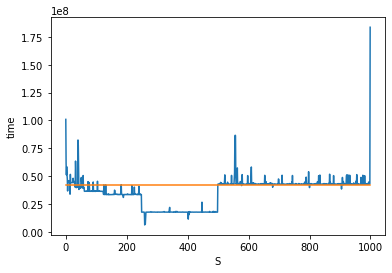

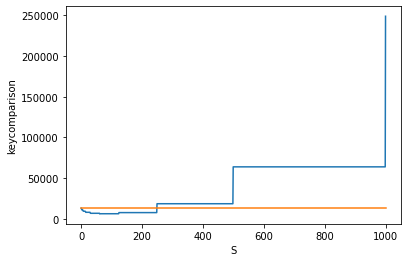

------------------------------------------------------------


In [202]:
compareOriginalAndModified(n)

### Random data, size n, in ascending order

Mergesort:
	time taken : 4771700ns 
	keyComparisons : 10088


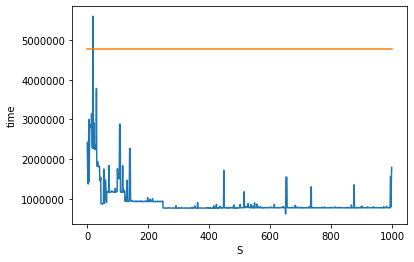

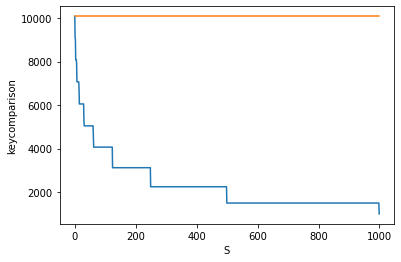

------------------------------------------------------------


In [205]:
compareOriginalAndModified(n, ascending = True)

### Random data, size n, in descending order

Mergesort:
	time taken : 141202300ns 
	keyComparisons : 4959


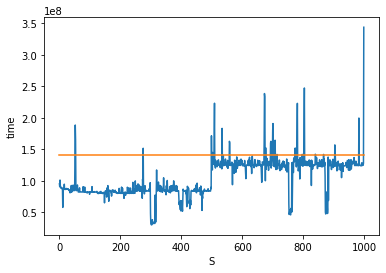

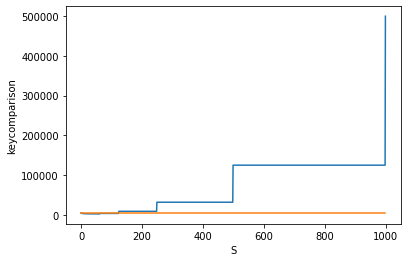

------------------------------------------------------------


In [207]:
compareOriginalAndModified(n, descending = True)

## Generating plots for different values of 'n'

### For n = 1000

Mergesort:
	time taken : 48768200ns 
	keyComparisons : 13106


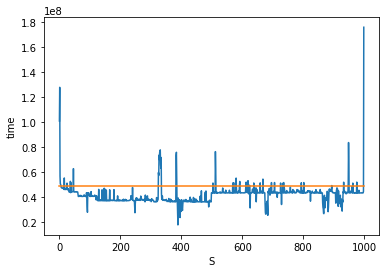

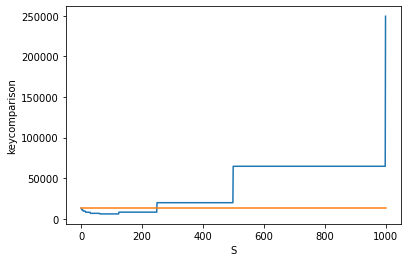

------------------------------------------------------------


In [193]:
compareOriginalAndModified(1000)

### For n = 10,000

Mergesort:
	time taken : 4539372300ns 
	keyComparisons : 179490


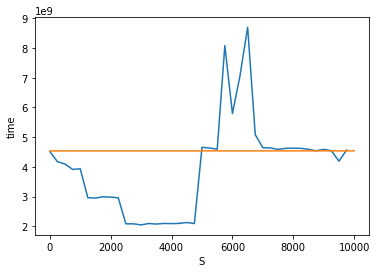

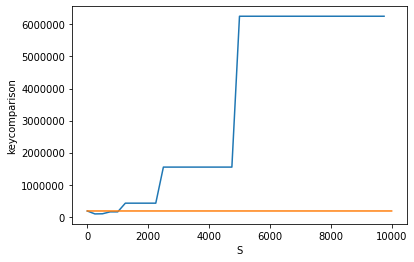

------------------------------------------------------------


In [210]:
compareOriginalAndModified(10000, step = 250)

### For n = 100,000

In [211]:
compareOriginalAndModified(100000, step = 2500)

Mergesort:
	time taken : 480292008700ns 
	keyComparisons : 2209423


KeyboardInterrupt: 